**Performance optimization**, also known as **performance tuning**, involves making changes to the current state of the data model so that it runs more efficiently. Essentially, when our data model is optimized, it performs better.

We might find that our report runs well in test and development environments, but when deployed to production for broader consumption, performance issues arise. From a report user's perspective, poor performance is characterized by report pages that take longer to load and visuals taking more time to update. This poor performance results in a negative user experience.

As a data analyst, we will spend approximately 90 percent of our time working with our data, and nine times out of ten, poor performance is a direct result of a bad data model, bad Data Analysis Expressions (DAX), or the mix of the two. The process of designing a data model for performance can be tedious, and it is often underestimated.

However, if we address performance issues during development, we will have a robust Power BI data model that will return better reporting performance and a more positive user experience. Ultimately, we will also be able to maintain optimized performance. As our organization grows, the size of its data grows, and its data model becomes more complex. By optimizing our data model early, we can mitigate the negative impact that this growth might have on the performance of our data model.

A smaller sized data model uses less resources (memory) and achieves faster data refresh, calculations, and rendering of visuals in reports. Therefore, the performance optimization process involves minimizing the size of the data model and making the most efficient use of the data in the model, which includes:

* Ensuring that the correct data types are used.
* Deleting unnecessary columns and rows.
* Avoiding repeated values.
* Replacing numeric columns with measures.
* Reducing cardinalities.
* Analyzing model metadata.
* Summarizing data where possible.

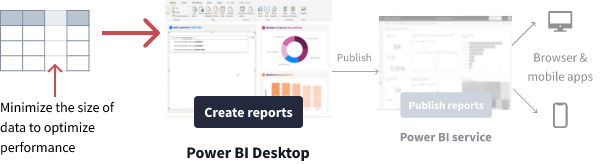

In this file, we will be introduced to the steps, processes, and concepts that are necessary to optimize a data model for enterprise-level performance. However, keep in mind that, while the basic performance and best practices guidance in Power BI will lead us a long way, to optimize a data model for query performance, we will likely have to partner with a data engineer to drive data model optimizing in the source data sources.

For example, assume that we work as a Microsoft Power BI developer for Tailwind Traders. We have been given a task to review a data model that was built a few years ago by another developer, a person who has since left the organization.

The **data model** produces a report that has received negative feedback from users. The users are happy with the results that they see in the report, but they are not satisfied with the report performance. Loading the pages in the report is taking too long, and tables are not refreshing quickly enough when certain selections are made. In addition to this feedback, the IT team has highlighted that the file size of this particular data model is too large, and it is putting a strain on the organization's resources. We need to review the data model to identify the root cause of the performance issues and make changes to optimization performance.

By the end of this file, we will be able to:

* Review the performance of measures, relationships, and visuals.
* Use variables to improve performance and troubleshooting.

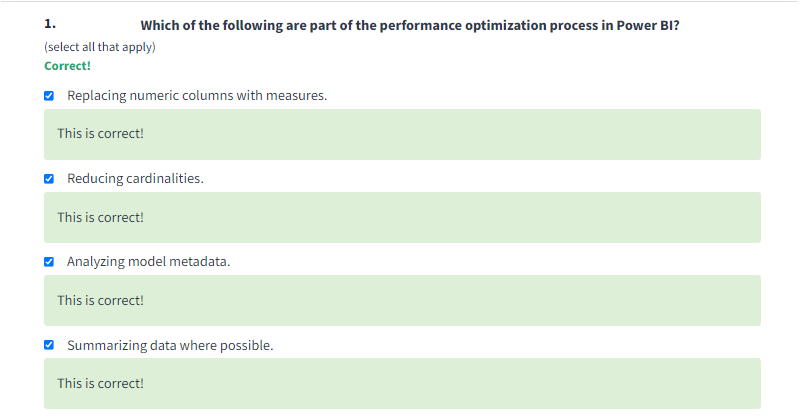

If our data model has multiple tables, complex relationships, intricate calculations, multiple visuals, and redundant data, a potential exists for poor report performance. The poor performance of a report leads to a negative user experience.

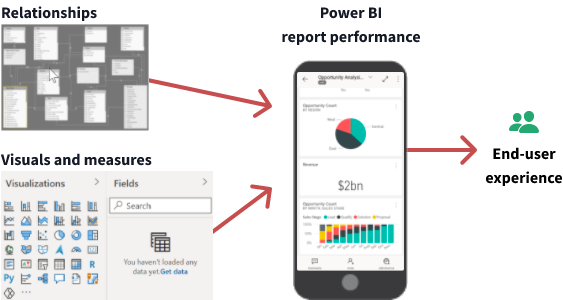

To optimize performance, we must first identify the source of the problem; in other words, find out which elements of our report and data model are causing the performance issues. Afterward, we can take action to resolve those issues and, therefore, improve performance.

**Identify report performance bottlenecks**

To achieve optimal performance in our reports, we need to create an efficient data model that has fast running queries and measures. When we have a good foundation, we can improve the model further by analyzing the query plans and dependencies and then making changes to further optimize performance.

We should review the measures and queries in our data model to ensure that we are using the most efficient way to get the results that you want. Our starting point should be to identify bottlenecks that exist in the code. When we identify the slowest query in the data model, we can focus on the biggest bottleneck first and establish a priority list to work through the other issues.

**Analyze performance**

We can use Performance analyzer in Power BI Desktop to help us find out how each of our report elements are performing when users interact with them. For example, we can determine how long it takes for a particular visual to refresh when it is initiated by a user interaction. Performance analyzer will help us identify the elements that are contributing to our performance issues, which can be useful during troubleshooting.

Before our run **Performance analyzer**, to ensure we get the most accurate results in our analysis (test), make sure that we start with a clear visual cache and a clear data engine cache.

* **Visual cache** - When we load a visual, we can't clear this visual cache without closing Power BI Desktop and opening it again. To avoid any caching in play, we need to start our analysis with a clean visual cache.

To ensure that we have a clear visual cache, add a blank page to our Power BI Desktop (`.pbix`) file and then, with that page selected, save and close the file. Reopen the Power BI Desktop (`.pbix`) file that we want to analyze. It will open on the blank page.

* **Data engine cache** - When a query is run, the results are cached, so the results of our analysis will be misleading. We need to clear the data cache before rerunning the visual.


To clear the data cache, we can either restart **Power BI Desktop** or connect **DAX Studio** to the data model and then call **Clear Cache**.

When we have cleared the caches and opened the Power BI Desktop file on the blank page, go to the **View** tab and select the **Performance analyzer** option.

To begin the analysis process, select **Start recording**, select the page of the report that we want to analyze, and interact with the elements of the report that we want to measure. We will see the results of our interactions display in the **Performance analyzer** pane as we work. When we are finished, select the **Stop** button.

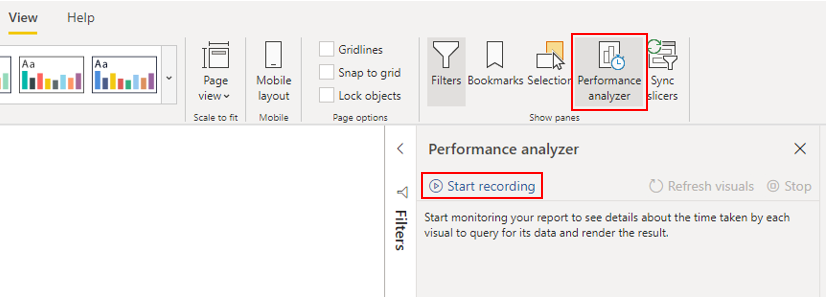

For more detailed information, see [Use Performance Analyzer](https://docs.microsoft.com/en-us/power-bi/create-reports/desktop-performance-analyzer/) to examine report element performance.

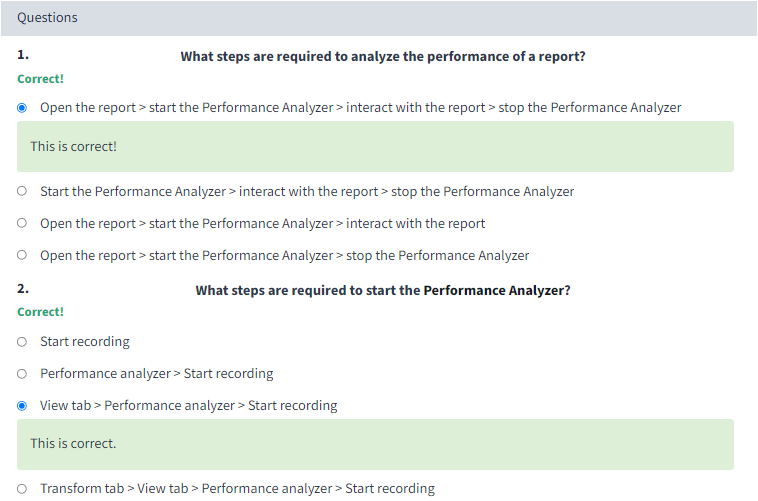

We can review the results of our performance test in the **Performance analyzer** pane. To review the tasks in order of duration, longest to shortest, right-click the **Sort** icon next to the **Duration (ms)** column header, and then select **Total time** in **Descending** order.

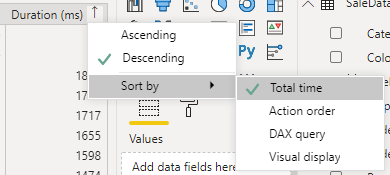

The log information for each visual shows how much time it took (duration) to complete the following categories of tasks:

* **DAX query** - The time it took for the visual to send the query, along with the time it took Analysis Services to return the results.
* **Visual display** - The time it took for the visual to render on the screen, including the time required to retrieve web images or geocoding.
* **Other** - The time it took the visual to prepare queries, wait for other visuals to complete, or perform other background processing tasks. If this category displays a long duration, the only real way to reduce this duration is to optimize DAX queries for other visuals, or reduce the number of visuals in the report.

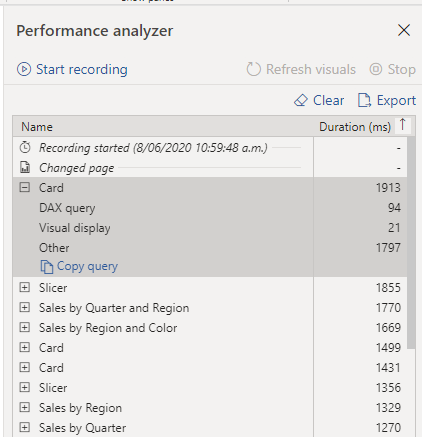

The results of the analysis test help us to understand the behavior of our data model and identify the elements that we need to optimize. We can compare the duration of each element in the report and identify the elements that have a long duration. We should focus on those elements and investigate why it takes them so long to load on the report page.

To analyze our queries in more detail, we can use DAX Studio, which is a free, open-source tool that is provided by another service.

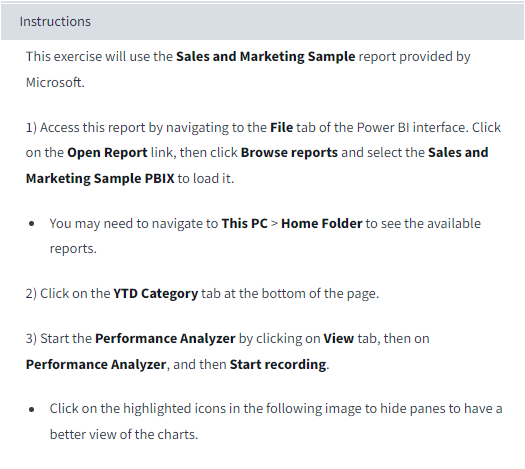

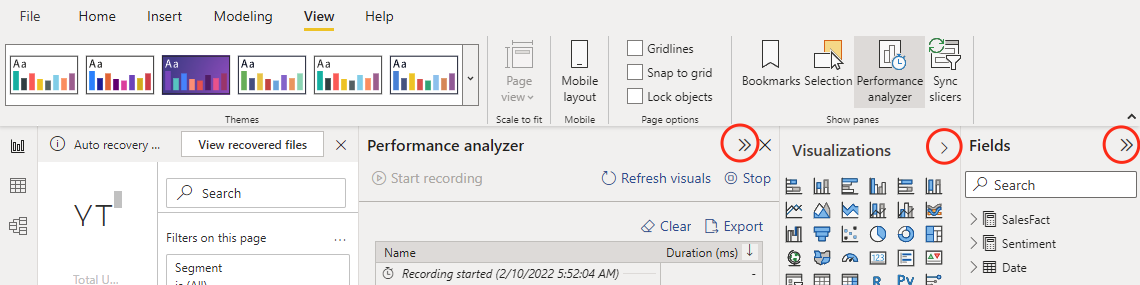

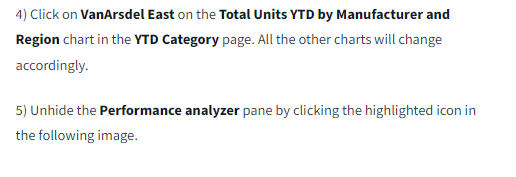

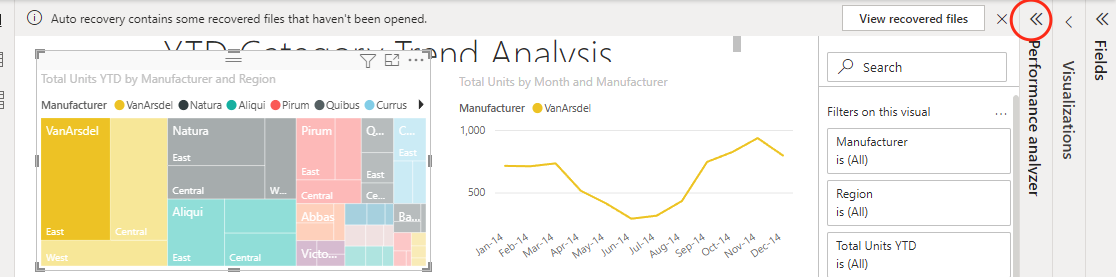

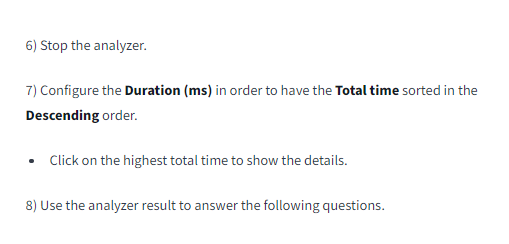

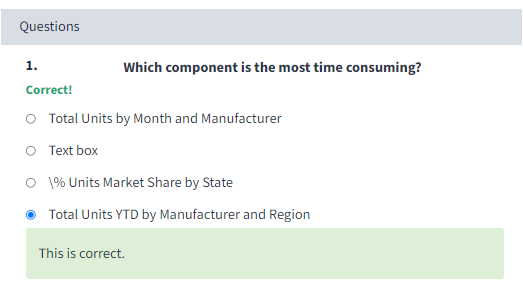

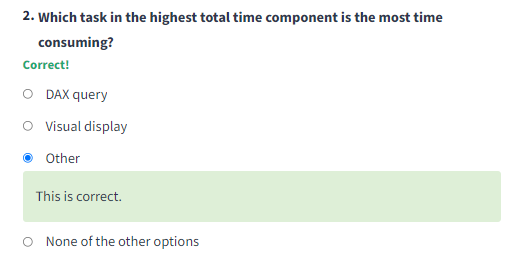

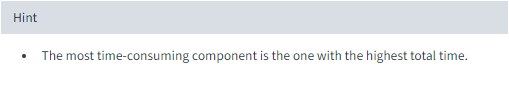

The results of our analysis will identify areas for improvement and opportunities for performance optimization. We might find that we need to carry out improvements to the visuals, the DAX query, or other elements in our data model.

The following information provides guidance on what to look for and the changes that we can make if it's visual issues.

If we identify **visuals as the bottleneck** leading to poor performance, we should find a way to improve performance with minimal impact to user experience.

1. **Consider the number of visuals on the report page**. Less visuals means better performance. Ask ourself if a visual is really necessary and if it adds value to the end user. If the answer is no, we should remove that visual. Rather than using multiple visuals on the page, consider other ways to provide additional details, such as drill-through pages and report page tooltips.

2. **Examine the number of fields in each visual**. The more visuals we have on the report, the higher chance for performance issues. In addition, the more visuals, the more the report can appear crowded and lose clarity. **The upper limit for visuals is 100 fields** (measures or columns), so a visual with more than 100 fields will be slow to load. Ask yourself if you really need all of this data in a visual. We might find that we can reduce the number of fields that we currently use.

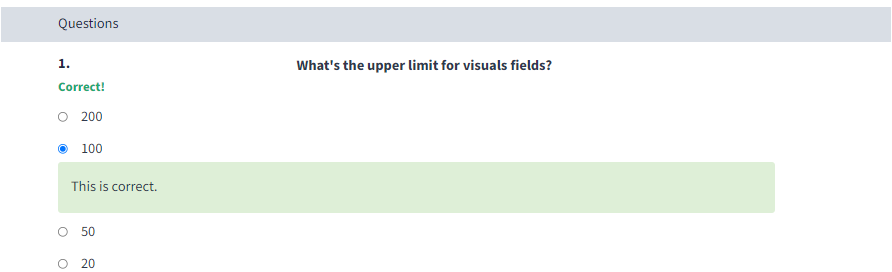

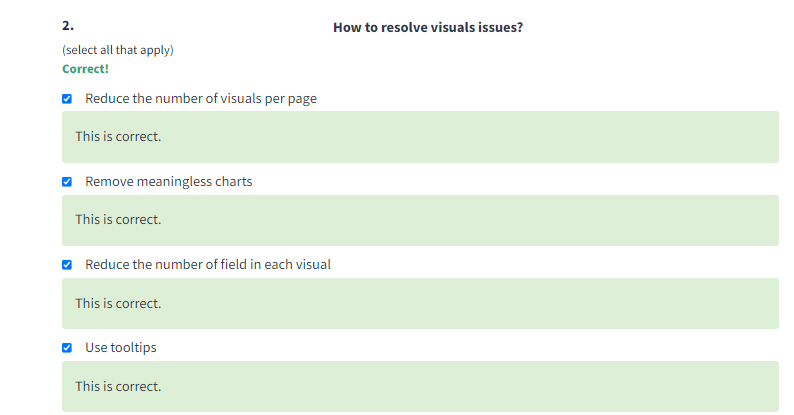

When we examine the results in the Performance analyzer pane, we can see how long it took the Power BI Desktop engine to evaluate each query (in milliseconds). A good starting point is any **DAX query that is taking longer than 120 milliseconds**. In this example, we identify one particular query that has a large duration time.

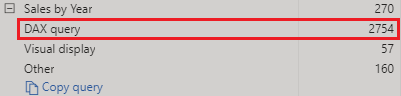

Performance analyzer highlights potential issues but does not tell us what needs to be done to improve them. We might want to conduct further investigation into why this measure takes so long to process. We can use **DAX Studio** to investigate our queries in more detail.

For example, we select **Copy Query** to copy the calculation formula onto the clipboard, then paste it into **Dax Studio**. We can then review the calculation step in more detail. In this example, we are trying to count the total number of products with order quantities greater than or equal to five.

`Count Customers =
 CALCULATE (
 DISTINCTCOUNT ( Order[ProductID] ),
 FILTER ( Order, Order[OrderQty] &#62;= 5 )
 )`

After analyzing the query, we can use our own knowledge and experience to identify where the performance issues are. We can also try using different DAX functions to see if they improve performance. In the following example, the `FILTER` function was replaced with the `KEEPFILTER` function. When the test was run again in Performance **analyzer**, the duration was shorter as a result of the `KEEPFILTER` function.

`Count Customers =
 CALCULATE (
 DISTINCTCOUNT ( Order[ProductID] ),
 KEEPFILTERS (Order[OrderQty] &#62;= 5 )
 )`

In this case, we can replace the `FILTER` function with the `KEEPFILTER` function to significantly reduce the evaluation duration time for this query. When we make this change, to check whether the duration time has improved or not, we clear the data cache and then rerun the **Performance analyzer** process.

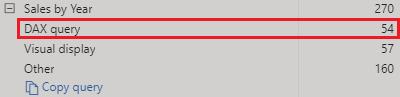

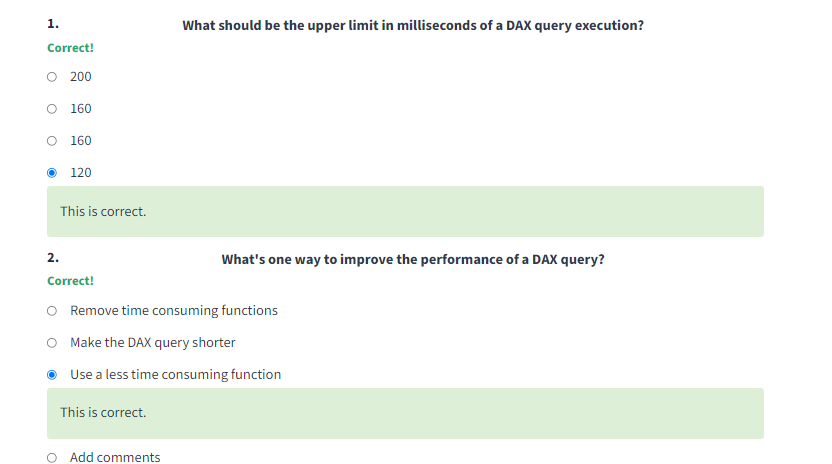

We have seen how to carry out improvements for visuals and DAX query. We might find that we need to carry out improvements to other elements in our data model as well.

The following information provides guidance on what to look for and the changes that we can make if it's other elements issues

If the duration of measures and visuals are displaying low values (in other words they have a short duration time), they are not the reason for the performance issues. Instead, if the DAX query is displaying a high duration value, it is likely that a measure is written poorly or an issue has occurred with the data model. The issue might be caused by the relationships, columns, or metadata in our model, or it could be the status of the **Auto date/time** option.

**Relationships**

We should review the relationships between our tables to ensure that we have established the correct relationships. Check that relationship cardinality properties are correctly configured. For example, a one-side column that contains unique values might be incorrectly configured as a many-side column. We will learn more about how cardinality affects performance later.

**Columns**

It is best practice to not import columns of data that we do not need. To avoid deleting columns in Power Query Editor, we should try to deal with them at the source when loading data into Power BI Desktop. However, if it is impossible to remove redundant columns from the source query or the data has already been imported in its raw state, we can always use Power Query Editor to examine each column. Ask ourself if we really need each column and try to identify the benefit that each one adds to our data model. If we find that a column adds no value, we should remove it from our data model. For example, suppose that we have an ID column with thousands of unique rows. We know that we won't use this particular column in a relationship, so it will not be used in a report. Therefore, we should consider this column as unnecessary and admit that it is wasting space in our data model.

When we remove an unnecessary column, we will reduce the size of the data model which, in turn, results in a smaller file size and faster refresh time. Also, because the dataset contains only relevant data, the overall report performance will be improved.

For more information, see [Data reduction techniques for Import modeling](https://docs.microsoft.com/en-us/power-bi/guidance/import-modeling-data-reduction).

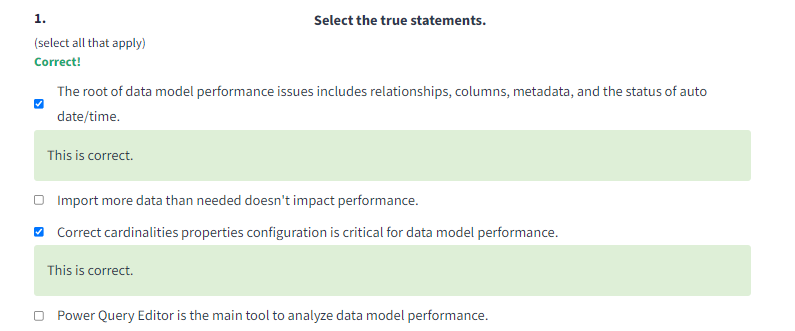

**Metadata** is information about other data. Power BI metadata contains information on our data model, such as the name, data type and format of each of the columns, the schema of the database, the report design, when the file was last modified, the data refresh rates, and much more.

When we load data into Power BI Desktop, it is good practice to analyze the corresponding metadata so we can **identify any inconsistences** with our dataset and normalize the data before we start to build reports. Running analysis on our metadata will improve data model performance because, while analyzing our metadata, we will identify unnecessary columns, errors within our data, incorrect data types, the volume of data being loaded (large datasets, including transactional or historic data, will take longer to load), and much more.

We can use Power Query Editor in Power BI Desktop to examine the columns, rows, and values of the raw data. We can then use the available tools, such as those highlighted in the following screenshot, to make the necessary changes.

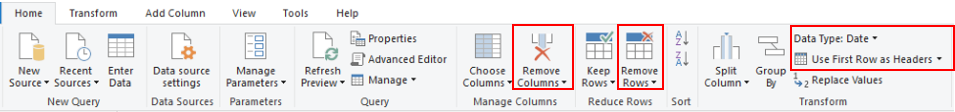

Basically, **clean and transform operations** help us to improve performance.

The Power Query options include:

* **Unnecessary columns** - Evaluates the need for each column. If one or more columns will not be used in the report and are therefore unnecessary, we should remove them by using the **Remove Columns** option on the **Home** tab.

* **Unnecessary rows** - Checks the first few rows in the dataset to see if they are empty or if they contain data that we do not need in our reports; if so, it removes those rows by using the **Remove Top Rows** option on the **Home** tab.

* **Data type** - Evaluates the column data types to ensure that each one is correct. If we identify a data type that is incorrect, change it by selecting the column, selecting **Data Type** on the **Transform** tab, and then selecting the correct data type from the list.

* **Query names** - Examines the query (table) names in the **Queries** pane. Just like we did for column header names, we should change uncommon or unhelpful query names to names that are more obvious or names that the user is more familiar with. We can rename a query by right-clicking that query, selecting **Rename**, editing the name as required, and then pressing **Enter**.

* **Column details** - Power Query Editor has the following three data preview options that we can use to analyze the metadata that is associated with our columns. We can find these options on the **View** tab, as illustrated in the following screenshot.

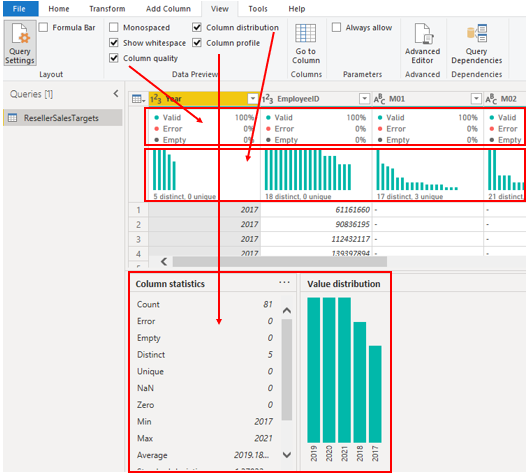

* **Column quality** - Determines what percentage of items in the column are valid, have errors, or are empty. If the Valid percentage is not 100, we should investigate the reason, correct the errors, and populate empty values.

* **Column distribution** - Identifies how many distinct items we have and how many are unique. This information is useful when we want to identify the cardinality of a column. We will investigate this further later.

* **Column profile** - Shows more statistics for the column and a chart showing the distribution of the unique items.

**Note:** If we are reviewing a large dataset with more than 1,000 rows, and we want to analyze that whole dataset, we need to change the default option at the bottom of the window. Select **Column profiling based on top 1000 rows > Column profiling based on entire data set**.

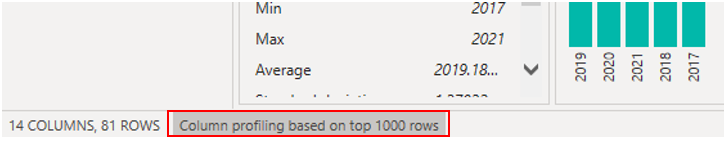

Other metadata that we should consider is the information about the data model as a whole, such as the file size and data refresh rates. We can find this metadata in the associated Power BI Desktop (`.pbix`) file. The data that we load into Power BI Desktop is compressed and stored to the disk by the **VertiPaq storage engine**. The size of our data model has a direct impact on its performance; a smaller sized data model uses less resources (memory) and achieves faster data refresh, calculations, and rendering of visuals in reports.

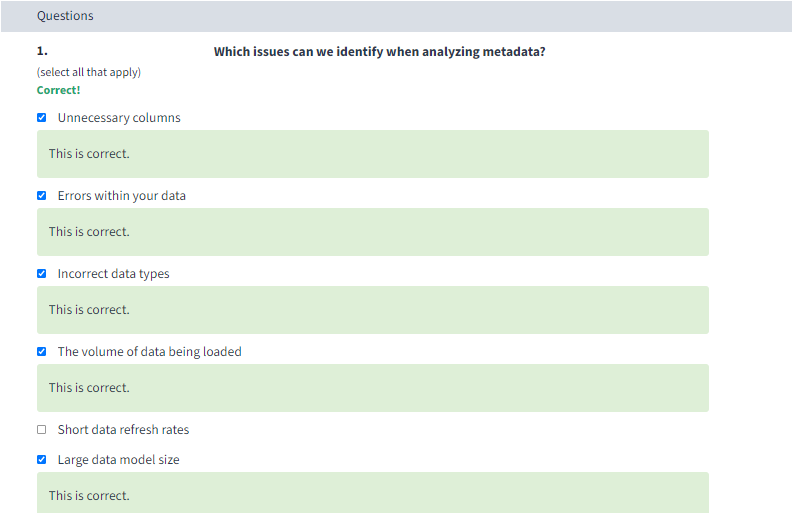

Another item to consider when optimizing performance is the **Auto date/time** option in Power BI Desktop. By default, this feature is enabled globally, which means that Power BI Desktop automatically creates a hidden calculated table for each date column, provided that certain conditions are met. The new, hidden tables are in addition to the tables that we already have in our dataset.

The **Auto date/time** option allows us to work with time intelligence when filtering, grouping, and drilling down through calendar time periods. We recommend that we keep the **Auto date/time** option enabled only when we work with calendar time periods and when we have simplistic model requirements in relation to time.

If our data source already defines a date dimension table, that table should be used to consistently define time within our organization, and we should disable the global **Auto date/time** option. Disabling this option can lower the size of our data model and reduce the refresh time.

We can **enable/disable** this **Auto date/time** option globally so that it applies to all of our Power BI Desktop files, or we can enable/disable the option for the current file so that it applies to an individual file only.

To enable/disable this Auto date/time option, go to **File > Options and settings > Options**, and then select either the **Global** or **Current File page**. On either page, select **Data Load** and then, in the **Time Intelligence** section, select or clear the check box as required.

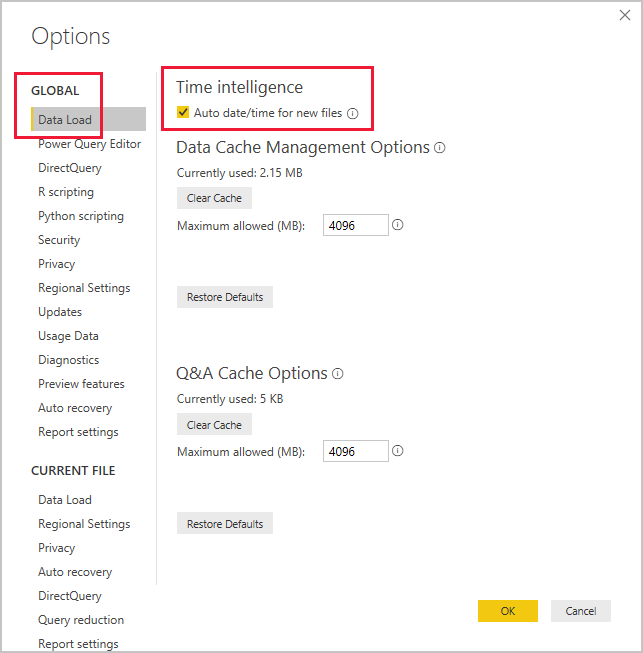

For an overview and general introduction to the Auto date/time feature, see [Apply auto date/time in Power BI Desktop](https://docs.microsoft.com/en-us/power-bi/transform-model/desktop-auto-date-time/).

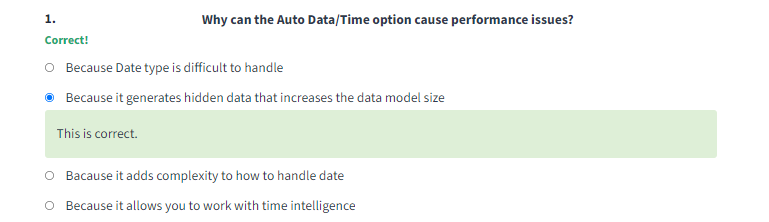

We can use variables in our DAX formulas to help us write less complex and more efficient calculations. Variables are underused by developers who are starting out in Power BI Desktop, but they are effective and we should use them by default when we are creating measures.

Some expressions involve the use of many nested functions and the reuse of expression logic. These expressions take a longer time to process and are difficult to read and, therefore, troubleshoot. If we use variables, we can save query processing time. This change is a step in the right direction toward optimizing the performance of a data model.

The use of variables in our data model provides the following advantages:

* **Improved performance** - Variables can make measures more efficient because they remove the need for Power BI to evaluate the same expression multiple times. We can achieve the same results in a query in about half the original processing time.
* **Improved readability** - Variables have short, self-describing names and are used in place of an ambiguous, multi-worded expression. We might find it easier to read and understand the formulas when variables are used.
* **Simplified debugging** - We can use variables to debug a formula and test expressions, which can be helpful during troubleshooting.
* **Reduced complexity** - Variables do not require the use of `EARLIER` or `EARLIEST` DAX functions, which are difficult to understand. These functions were required before variables were introduced, and were written in complex expressions that introduced new filter contexts. Now that we can use variables instead of those functions, we can write fewer complex formulas.

To illustrate how we can **use a variable to make a measure more efficient**, the following table displays a measure definition in two different ways. Notice that the formula repeats the expression that calculates **same period last year** but in two different ways: the first instance uses the normal DAX calculation method and the second one uses variables in the calculation.

The second row of the table shows the improved measure definition. This definition uses the **VAR** keyword to introduce a variable named `SalesPriorYear`, and it uses an expression to assign the **same period last year** result to that new variable. It then uses the variable twice in the `RETURN` expression.

* Without a variable:

    `Sales YoY Growth =
 DIVIDE (
 ( [Sales] - CALCULATE ( [Sales], PARALLELPERIOD ( 'Date'[Date], -12, MONTH ) ) ),
 CALCULATE ( [Sales], PARALLELPERIOD ( 'Date'[Date], -12, MONTH ) )
 )`

* With a variable:

    `Sales YoY Growth =
 VAR SalesPriorYear =
 CALCULATE ( [Sales], PARALLELPERIOD ( 'Date'[Date], -12, MONTH ) )
 VAR SalesVariance =
 DIVIDE ( ( [Sales] - SalesPriorYear ), SalesPriorYear )
 RETURN
 SalesVariance`

In the first measure definition in the table, the formula is inefficient because it requires Power BI to evaluate the same expression twice. The second definition is more efficient because, due to the variable, Power BI only needs to evaluate the `PARALLEDPERIOD` expression once.

If our data model has multiple queries with multiple measures, the use of variables could cut the overall query processing time in half and improve the overall performance of the data model. Furthermore, this solution is a simple one; imagine the savings as the formulas get more complicated, for instance, when we are dealing with percentages and running totals.

When writing a query that includes logical expressions, like `IF` statements, using the [DAX function `SWITCH`](https://docs.microsoft.com/en-us/dax/switch-function-dax) can improve performance. 

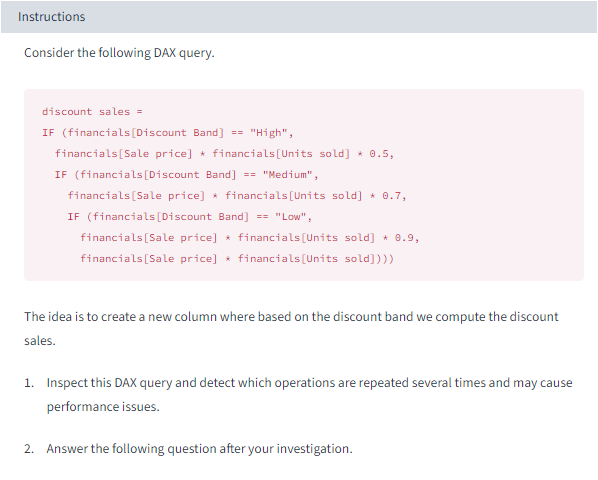

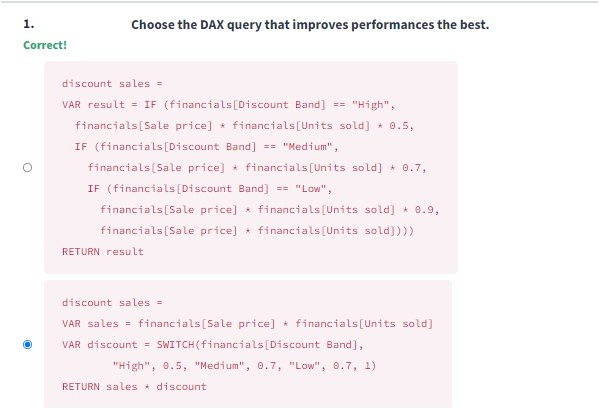

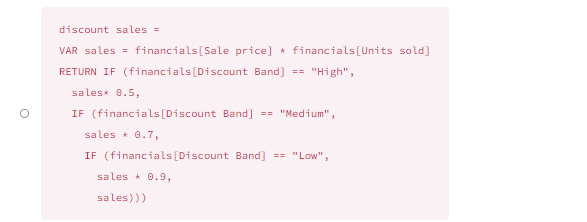

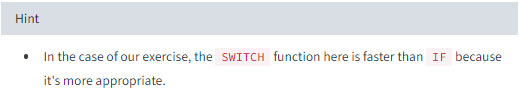

**Variables** are useful for many ends in Power BI. Other than the performance optimization it's also use for:

* Code readability.
* Debugging.

**Use variables to improve readability**

In addition to improved performance, we might notice how the use of variables makes the code simpler to read.

When using variables, it is best practice to use descriptive names for the variables. In the previous example, the variable is called `SalesPriorYear`, which clearly states what the variable is calculating.

Consider the outcome of using a variable that was called `X`, `temp` or `variable1`; the purpose of the variable would not be clear at all.

Using clear, concise, meaningful names will help make it easier for us to understand what we are trying to calculate, and it will be much simpler for other developers to maintain the report in the future.

**Use variables to troubleshoot multiple steps**

We can use variables to help us debug a formula and identify what the issue is. Variables help simplify the task of troubleshooting our DAX calculation by evaluating each variable separately and by recalling them after the `RETURN` expression.

In the following example, we test an expression that is assigned to a variable. In order to debug we temporarily rewrite the `RETURN` expression to write to the variable. The measure definition returns only the `SalesPriorYear` variable because that is what comes after the `RETURN` expression.

`Sales YoY Growth % =
 VAR SalesPriorYear =  CALCULATE([Sales], PARALLELPERIOD('Date'[Date], -12, MONTH))
 VAR SalesPriorYear% = DIVIDE(([Sales] - SalesPriorYear), SalesPriorYear)
 RETURN  SalesPriorYear%`

The `RETURN` expression will display the `SalesPriorYear` value only. This technique allows us to revert the expression when we have completed the debugging. It also makes calculations simpler to understand due to reduced complexity of the DAX code.

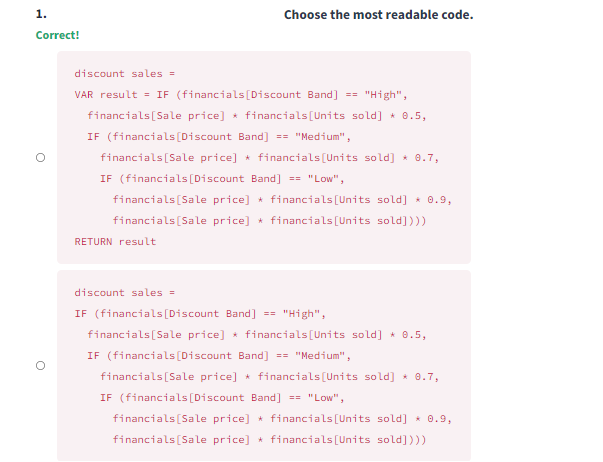

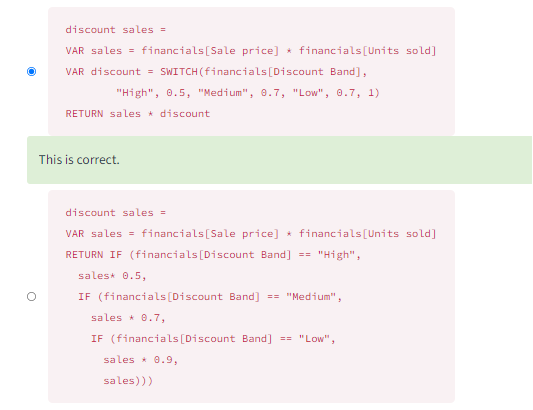

In this file, we learned how to review the performance of measures, relationships, and visuals. We also used variables to improve performance and troubleshooting. We used Performance analyzer in Power BI Desktop to find out how report elements are performing when users interact with them. We learned that performance optimization, also known as performance tuning, involves making changes to the current state of the data model so that it runs more efficiently.